In [32]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

I chose gaming access control for disabled people as I am interested in topics of how to make life easier and more comfortable for disabled people. However I faced some difficulties because there is absolulty no data about sales of gaming access control for disabled people, so I decided to do the following. I took the data of overall consoles sales(which was also difficult to find) and I found research about what percent of players are disabled or have some diabilites. As a result of that small research, I decided to take 20 percent of total sales as sales for disabled people. Based on that data I constructed the Bass Model. 

About the market: main/big companies like Microsoft and Sony launched gaming access control for disabled people, so there is competition in the market, however, it was not possible to mind data about their sales.
References: https://www.marketingcharts.com/industries/media-and-entertainment-4920 , https://www.scope.org.uk/campaigns/research-policy/accessibility-in-gaming/

In [54]:
#defining bass functions
def bass_f(t, p, q):
    return ((p + q)**2 / p) * np.exp(-(p + q) * t) / (1 + (q / p) * np.exp(-(p + q) * t))**2

def bass_F(t, p, q):
    return (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

In [55]:
sales_data = pd.read_csv('consolessales.csv')

years = sales_data['Released Year']
sales = sales_data['Units sold (million)']
sales = sales * 0.2

#function for fitting
def fit_bass_model(t, p, q):
    return bass_F(t, p, q)

In [58]:
#i took  my estimates small because i do understand that it is a small market and adoption is not gonna be easy.
p0 = [0.01, 0.1]  # initial guesses
params, params_covariance = curve_fit(fit_bass_model, years, sales, p0=p0)

estimated_p, estimated_q = params

print("Initial paramenters:")
print("p:", estimated_p)
print("q:", estimated_q)

Initial paramenters:
p: 0.01
q: 0.1


C:\Users\Lusine\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


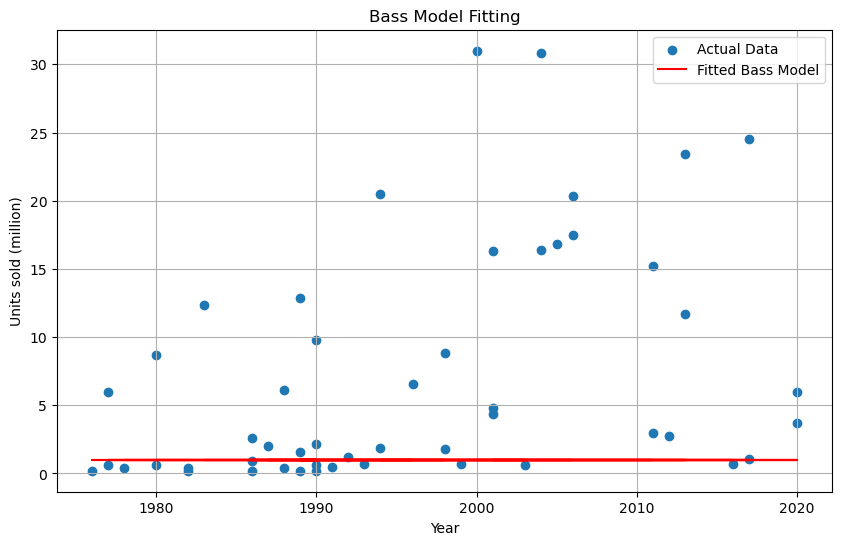

In [59]:
#plotting
plt.figure(figsize=(10, 6))
plt.scatter(years, sales, label='Actual Data')
plt.plot(years, bass_F(years, estimated_p, estimated_q), color='red', label='Fitted Bass Model')
plt.xlabel('Year')
plt.ylabel('Units sold (million)')
plt.title('Bass Model Fitting')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
#predicting
future_years = range(max(years) + 1, max(years) + 3)
predicted_sales = bass_F(future_years, estimated_p, estimated_q)

print("\nPredicted sales for the next 2 years:")
for year, sales_count in zip(future_years, predicted_sales):
    print("Year:", year, "Predicted Sales:", round(sales_count, 2))


Predicted sales for the next 2 years:
Year: 2021 Predicted Sales: 1.0
Year: 2022 Predicted Sales: 1.0


In [62]:
#estimating using Fermi's model
potential_market_share = estimated_p + estimated_q / estimated_p

print("\nEstimated potential market share:", round(potential_market_share, 2), "%")


Estimated potential market share: 10.01 %
